<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Algoritmos/K%20Means/4_3_2_KMeans_Evaluacion_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('Iris2D.csv')

data['class-int']=np.where(data['class']=='Iris-versicolor',0,1)

print(data.head())

   petallength  petalwidth            class  class-int
0          4.7         1.4  Iris-versicolor          0
1          4.5         1.5  Iris-versicolor          0
2          4.9         1.5  Iris-versicolor          0
3          4.0         1.3  Iris-versicolor          0
4          4.6         1.5  Iris-versicolor          0


##Función para algoritmos K-Means

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[[5.59583333 2.0375    ]
 [4.26923077 1.34230769]]
[2.0375     1.34230769]


<ipython-input-9-772e8daad2f0>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Valores['Grupo']=Grupos.labels_


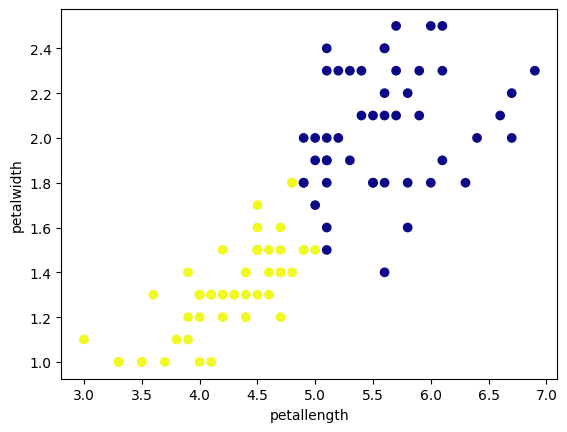

In [9]:
from sklearn.cluster import KMeans

#Sacar solo los valores (no la clase)
Valores=data[['petallength','petalwidth']]
#print(Valores)

#Establecer los datos del modelo
Algoritmo= KMeans(n_clusters=2, max_iter=10,n_init=5)
#n_init: Número de veces que se reinicias los centroides aleatorios

#Agrupar las instancias
Grupos=Algoritmo.fit(Valores)

#### Termina el algoritmo ####

#Cluster asociado a cada instancia
print(Grupos.labels_) #Retorna las etiquetas (grupos) asociados a cada instancia

#Centroides del ciclo
print(Grupos.cluster_centers_)

#Imprimir columnas (primera: 0, segunda 1)
print(Grupos.cluster_centers_[:,1])

Valores['Grupo']=Grupos.labels_
#plt.scatter(Valores['petallength'][Valores['Grupo']==0],Valores['petalwidth'][Valores['Grupo']==0], color='red')
#plt.scatter(Valores['petallength'][Valores['Grupo']==1],Valores['petalwidth'][Valores['Grupo']==1], color='blue')
plt.scatter(Valores['petallength'],Valores['petalwidth'], c=Grupos.labels_, cmap='plasma')
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.show()


¿Cómo evaluar?

In [10]:
#Coeficiente de silhouette
from sklearn import metrics
Metrica=metrics.silhouette_score(data[['petallength','petalwidth']], Grupos.labels_,metric='euclidean')
print(Metrica)

0.5370245423277251


#Método del codo

2 ---> 29.349358974358967 0.5370245423277251
3 ---> 20.897121212121206 0.4218444600899347
4 ---> 12.18479367588933 0.41182040390150704
5 ---> 10.053940055825183 0.40323587925925913
6 ---> 7.259343349632821 0.4043971038939235
7 ---> 6.814302802460696 0.34681648908981544
8 ---> 4.881035330751119 0.4050635684862389
9 ---> 4.281346875346872 0.3680990950258075
10 ---> 4.264564912280703 0.38593570427906926


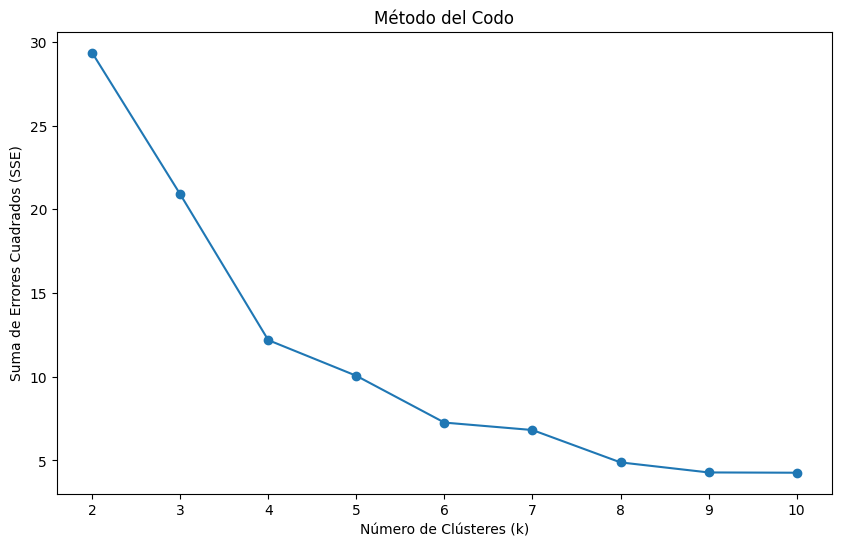

In [20]:
import numpy as np
import matplotlib.pyplot as plt

inercia = []
sil=[]
k = range(2, 11)

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Valores)
    inercia.append(kmeans.inertia_)
    #print(kmeans.inertia_)
    sil.append(metrics.silhouette_score(data[['petallength','petalwidth']], kmeans.labels_,metric='euclidean'))
    print(i,'--->',kmeans.inertia_,sil[-1])

plt.figure(figsize=(10, 6))
plt.plot(k, inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Suma de Errores Cuadrados (SSE)')
plt.xticks(k)

plt.show()

Metodo del codo

2 --> 29.349358974358967 0.5370245423277251
3 --> 20.671978021978013 0.4457292650628915
4 --> 12.257017045454546 0.4114399777074347
5 --> 10.088886639676115 0.3983747440589472
6 --> 7.371060335621663 0.3960719671975946
7 --> 6.912471405787194 0.3559383939321964
8 --> 6.201694805194804 0.3165360133519703
9 --> 4.891684258723732 0.3761990529041871
10 --> 3.844255665902721 0.3490162372983876


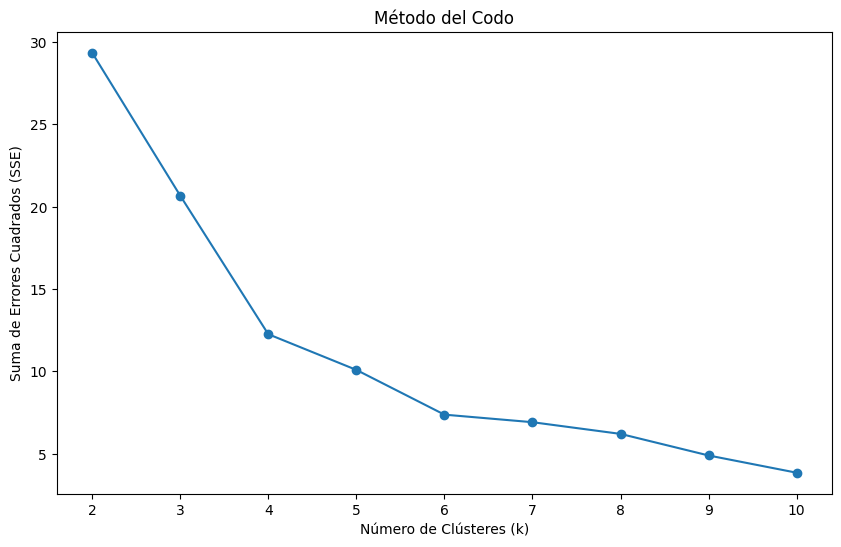

In [22]:
import numpy as np
import matplotlib.pyplot as plt

inercia = []
sil = []
k = range(2, 11)

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Valores)
    inercia.append(kmeans.inertia_)
    sil.append(metrics.silhouette_score(data[['petallength','petalwidth']], kmeans.labels_,metric='euclidean'))
    print(i,"-->",kmeans.inertia_,sil[-1])


plt.figure(figsize=(10, 6))
plt.plot(k, inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Suma de Errores Cuadrados (SSE)')
plt.xticks(k)

plt.show()

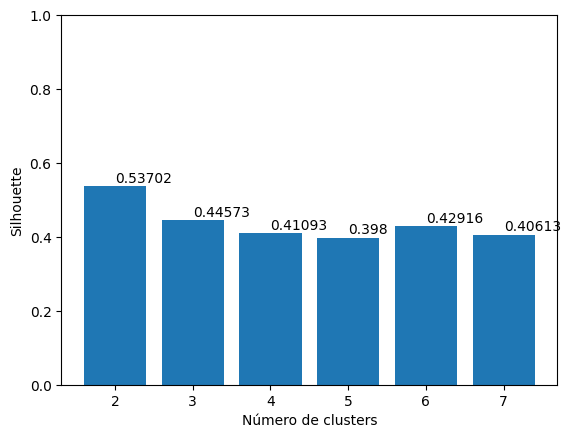

In [23]:
n=[2,3,4,5,6,7]
Metricas=[]
for x in n:
  Algoritmo= KMeans(n_clusters=x)#, max_iter=10,n_init=5)
  #n_init: Número de veces que se reinicias los centroides aleatorios

  #Agrupar las instancias
  Grupos=Algoritmo.fit(Valores)
  Metricas.append(metrics.silhouette_score(data[['petallength','petalwidth']], Grupos.labels_,metric='euclidean'))

Metricas

plt.bar(n,Metricas)
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette')
for index, value in enumerate(Metricas):
  plt.text(index+2, value+0.01,str(round(value,5)))
plt.ylim(0,1)
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html 4_3_2_KMeans_Evaluacion_Base.ipynb

[NbConvertApp] Converting notebook 4_3_2_KMeansAutomatico_Evaluacion.ipynb to html
[NbConvertApp] Writing 993178 bytes to 4_3_2_KMeansAutomatico_Evaluacion.html
